In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/data_science/computer_vision/session7_assignment/EVA5_AI_Projects_new-master")

In [ ]:
import time
!pip install torchsummary
from data.base_data_utils import get_data_loaders
from utils.misc_utils import get_device_type
from models.networks.cifar10_dialation_dsc_vgg import Cifar10NetVGG
from configs import basic_config
from utils.visualization_utils import plot_multigraph, plot_misclassified_images
from models.model_builder import build_model
from utils import logger_utils
from torchsummary import summary
import torch
from orchestrators.base_orchestrators import start_training,display_classwise_accuracy

In [ ]:
logger = logger_utils.get_logger(__name__)

In [ ]:
train_loader, test_loader = get_data_loaders(dataset_name='cifar10')


**** Started Loading data ****

Files already downloaded and verified
CUDA Available? True
Files already downloaded and verified
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****



In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

 ship   cat   cat horse


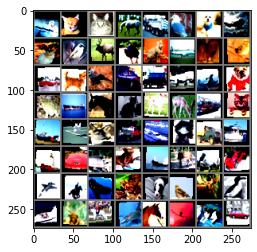

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(3,32,32))

In [ ]:
device = get_device_type()
model = Cifar10NetVGG().to(device)
print_summary(model,'Network summary')

Network summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
 Conv2d_BasicBlock-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
 Conv2d_BasicBlock-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
Conv2d_BasicBlock-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14   

/content/drive/My Drive/data_science/computer_vision/session7_assignment/Week7New/models/networks/cifar10_dialation_dsc_vgg.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [ ]:
EPOCHS = basic_config.EPOCHS
device = get_device_type()
results = {}
models_dict = {'cifar10': {'model': model}
          }

lst_plottingJobs_val_acc = []
lst_plottingLegends_val_acc = []
lst_plottingJobs_loss = []
lst_plottingLegends_loss = []

results = start_training(EPOCHS, device, train_loader, test_loader, **models_dict)

  0%|          | 0/782 [00:00<?, ?it/s]


**** Started training ****


Model: cifar10

0 0
[EPOCH:0]


/content/drive/My Drive/data_science/computer_vision/session7_assignment/Week7New/models/networks/cifar10_dialation_dsc_vgg.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=1.248397946357727 Batch_id=781 Current_train_batch_accuracy=43.14: 100%|██████████| 782/782 [00:24<00:00, 31.33it/s]



Train set: Average loss: 1.3474, Accuracy: 25508/50000 (51.02%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3019, Accuracy: 5236/10000 (52.36%)

best_test_accuracy 52.36
[EPOCH:1]


Loss=1.062764048576355 Batch_id=781 Current_train_batch_accuracy=62.12: 100%|██████████| 782/782 [00:25<00:00, 31.11it/s]



Train set: Average loss: 1.0886, Accuracy: 30825/50000 (61.65%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0599, Accuracy: 6272/10000 (62.72%)

best_test_accuracy 62.72
[EPOCH:2]


Loss=0.662542998790741 Batch_id=781 Current_train_batch_accuracy=69.64: 100%|██████████| 782/782 [00:24<00:00, 31.29it/s]



Train set: Average loss: 0.8476, Accuracy: 35169/50000 (70.34%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8093, Accuracy: 7198/10000 (71.98%)

best_test_accuracy 71.98
[EPOCH:3]


Loss=1.0998024940490723 Batch_id=781 Current_train_batch_accuracy=73.73: 100%|██████████| 782/782 [00:24<00:00, 31.32it/s]



Train set: Average loss: 0.9319, Accuracy: 33451/50000 (66.90%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8882, Accuracy: 6922/10000 (69.22%)

best_test_accuracy 71.98
[EPOCH:4]


Loss=0.8639366626739502 Batch_id=781 Current_train_batch_accuracy=76.02: 100%|██████████| 782/782 [00:25<00:00, 30.85it/s]



Train set: Average loss: 0.7388, Accuracy: 37248/50000 (74.50%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7014, Accuracy: 7610/10000 (76.10%)

best_test_accuracy 76.1
[EPOCH:5]


Loss=1.7330729961395264 Batch_id=781 Current_train_batch_accuracy=78.17: 100%|██████████| 782/782 [00:24<00:00, 31.38it/s]



Train set: Average loss: 0.5912, Accuracy: 39614/50000 (79.23%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5844, Accuracy: 7941/10000 (79.41%)

best_test_accuracy 79.41
[EPOCH:6]


Loss=0.7467132806777954 Batch_id=781 Current_train_batch_accuracy=79.42: 100%|██████████| 782/782 [00:25<00:00, 31.13it/s]



Train set: Average loss: 0.5637, Accuracy: 40157/50000 (80.31%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5684, Accuracy: 8047/10000 (80.47%)

best_test_accuracy 80.47
[EPOCH:7]


Loss=0.21268931031227112 Batch_id=781 Current_train_batch_accuracy=80.63: 100%|██████████| 782/782 [00:25<00:00, 30.79it/s]



Train set: Average loss: 0.5753, Accuracy: 40055/50000 (80.11%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6132, Accuracy: 7953/10000 (79.53%)

best_test_accuracy 80.47
[EPOCH:8]


Loss=0.2561750113964081 Batch_id=781 Current_train_batch_accuracy=81.45: 100%|██████████| 782/782 [00:25<00:00, 31.07it/s]



Train set: Average loss: 0.5160, Accuracy: 41009/50000 (82.02%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5326, Accuracy: 8195/10000 (81.95%)

best_test_accuracy 81.95
[EPOCH:9]


Loss=0.7313964366912842 Batch_id=781 Current_train_batch_accuracy=82.38: 100%|██████████| 782/782 [00:25<00:00, 31.08it/s]



Train set: Average loss: 0.5445, Accuracy: 40673/50000 (81.35%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5860, Accuracy: 8024/10000 (80.24%)

best_test_accuracy 81.95
[EPOCH:10]


Loss=0.5985410213470459 Batch_id=781 Current_train_batch_accuracy=83.00: 100%|██████████| 782/782 [00:25<00:00, 30.96it/s]



Train set: Average loss: 0.4884, Accuracy: 41403/50000 (82.81%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5173, Accuracy: 8216/10000 (82.16%)

best_test_accuracy 82.16
[EPOCH:11]


Loss=0.3851150572299957 Batch_id=781 Current_train_batch_accuracy=83.82: 100%|██████████| 782/782 [00:25<00:00, 31.05it/s]



Train set: Average loss: 0.4304, Accuracy: 42508/50000 (85.02%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4693, Accuracy: 8404/10000 (84.04%)

best_test_accuracy 84.04
[EPOCH:12]


Loss=0.8806915283203125 Batch_id=781 Current_train_batch_accuracy=84.29: 100%|██████████| 782/782 [00:25<00:00, 31.11it/s]



Train set: Average loss: 0.4402, Accuracy: 42307/50000 (84.61%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4685, Accuracy: 8391/10000 (83.91%)

best_test_accuracy 84.04
[EPOCH:13]


Loss=0.561642050743103 Batch_id=781 Current_train_batch_accuracy=84.74: 100%|██████████| 782/782 [00:25<00:00, 31.13it/s]



Train set: Average loss: 0.3989, Accuracy: 43047/50000 (86.09%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4587, Accuracy: 8406/10000 (84.06%)

best_test_accuracy 84.06
[EPOCH:14]


Loss=0.5268748998641968 Batch_id=781 Current_train_batch_accuracy=85.34: 100%|██████████| 782/782 [00:25<00:00, 31.24it/s]



Train set: Average loss: 0.3947, Accuracy: 43103/50000 (86.21%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4537, Accuracy: 8471/10000 (84.71%)

best_test_accuracy 84.71
[EPOCH:15]


Loss=0.8722703456878662 Batch_id=781 Current_train_batch_accuracy=85.83: 100%|██████████| 782/782 [00:25<00:00, 30.71it/s]



Train set: Average loss: 0.3816, Accuracy: 43406/50000 (86.81%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4534, Accuracy: 8475/10000 (84.75%)

best_test_accuracy 84.75
[EPOCH:16]


Loss=0.3016722798347473 Batch_id=781 Current_train_batch_accuracy=86.24: 100%|██████████| 782/782 [00:25<00:00, 31.26it/s]



Train set: Average loss: 0.3946, Accuracy: 42956/50000 (85.91%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4862, Accuracy: 8381/10000 (83.81%)

best_test_accuracy 84.75
[EPOCH:17]


Loss=0.5323907732963562 Batch_id=781 Current_train_batch_accuracy=86.64: 100%|██████████| 782/782 [00:25<00:00, 31.12it/s]



Train set: Average loss: 0.3668, Accuracy: 43553/50000 (87.11%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4507, Accuracy: 8496/10000 (84.96%)

best_test_accuracy 84.96
[EPOCH:18]


Loss=0.8882107734680176 Batch_id=781 Current_train_batch_accuracy=87.15: 100%|██████████| 782/782 [00:25<00:00, 30.90it/s]



Train set: Average loss: 0.3595, Accuracy: 43685/50000 (87.37%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4620, Accuracy: 8457/10000 (84.57%)

best_test_accuracy 84.96
[EPOCH:19]


Loss=0.32310956716537476 Batch_id=781 Current_train_batch_accuracy=87.28: 100%|██████████| 782/782 [00:25<00:00, 31.03it/s]



Train set: Average loss: 0.3421, Accuracy: 43965/50000 (87.93%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4317, Accuracy: 8533/10000 (85.33%)

best_test_accuracy 85.33
[EPOCH:20]


Loss=0.6831722259521484 Batch_id=781 Current_train_batch_accuracy=87.84: 100%|██████████| 782/782 [00:25<00:00, 31.16it/s]



Train set: Average loss: 0.3226, Accuracy: 44428/50000 (88.86%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4242, Accuracy: 8591/10000 (85.91%)

best_test_accuracy 85.91
[EPOCH:21]


Loss=0.5313585996627808 Batch_id=781 Current_train_batch_accuracy=87.85: 100%|██████████| 782/782 [00:25<00:00, 30.93it/s]



Train set: Average loss: 0.3197, Accuracy: 44317/50000 (88.63%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4108, Accuracy: 8610/10000 (86.10%)

best_test_accuracy 86.1
[EPOCH:22]


Loss=0.2158907800912857 Batch_id=781 Current_train_batch_accuracy=88.23: 100%|██████████| 782/782 [00:25<00:00, 31.05it/s]



Train set: Average loss: 0.3611, Accuracy: 43495/50000 (86.99%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4633, Accuracy: 8452/10000 (84.52%)

best_test_accuracy 86.1
[EPOCH:23]


Loss=0.45367440581321716 Batch_id=781 Current_train_batch_accuracy=88.44: 100%|██████████| 782/782 [00:25<00:00, 31.13it/s]



Train set: Average loss: 0.2988, Accuracy: 44695/50000 (89.39%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4021, Accuracy: 8685/10000 (86.85%)

best_test_accuracy 86.85
[EPOCH:24]


Loss=0.5913148522377014 Batch_id=781 Current_train_batch_accuracy=88.60: 100%|██████████| 782/782 [00:25<00:00, 31.00it/s]



Train set: Average loss: 0.2837, Accuracy: 45019/50000 (90.04%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4002, Accuracy: 8698/10000 (86.98%)

best_test_accuracy 86.98
[EPOCH:25]


Loss=0.15521973371505737 Batch_id=781 Current_train_batch_accuracy=91.19: 100%|██████████| 782/782 [00:24<00:00, 31.29it/s]



Train set: Average loss: 0.2200, Accuracy: 46125/50000 (92.25%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3577, Accuracy: 8834/10000 (88.34%)

best_test_accuracy 88.34
[EPOCH:26]


Loss=0.4642287492752075 Batch_id=781 Current_train_batch_accuracy=91.73: 100%|██████████| 782/782 [00:25<00:00, 30.91it/s]



Train set: Average loss: 0.2066, Accuracy: 46418/50000 (92.84%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3566, Accuracy: 8845/10000 (88.45%)

best_test_accuracy 88.45
[EPOCH:27]


Loss=0.8221526145935059 Batch_id=781 Current_train_batch_accuracy=92.09: 100%|██████████| 782/782 [00:25<00:00, 30.92it/s]



Train set: Average loss: 0.2002, Accuracy: 46458/50000 (92.92%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3560, Accuracy: 8877/10000 (88.77%)

best_test_accuracy 88.77
[EPOCH:28]


Loss=0.3539052903652191 Batch_id=781 Current_train_batch_accuracy=92.15: 100%|██████████| 782/782 [00:25<00:00, 30.92it/s]



Train set: Average loss: 0.1949, Accuracy: 46583/50000 (93.17%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3537, Accuracy: 8896/10000 (88.96%)

best_test_accuracy 88.96
[EPOCH:29]


Loss=0.3505346477031708 Batch_id=781 Current_train_batch_accuracy=92.46: 100%|██████████| 782/782 [00:25<00:00, 30.92it/s]



Train set: Average loss: 0.1984, Accuracy: 46453/50000 (92.91%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3582, Accuracy: 8872/10000 (88.72%)

best_test_accuracy 88.96
[EPOCH:30]


Loss=0.3372833728790283 Batch_id=781 Current_train_batch_accuracy=92.29: 100%|██████████| 782/782 [00:25<00:00, 30.96it/s]



Train set: Average loss: 0.1830, Accuracy: 46789/50000 (93.58%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3617, Accuracy: 8900/10000 (89.00%)

best_test_accuracy 89.0
[EPOCH:31]


Loss=0.30559077858924866 Batch_id=781 Current_train_batch_accuracy=92.64: 100%|██████████| 782/782 [00:25<00:00, 30.68it/s]



Train set: Average loss: 0.1845, Accuracy: 46695/50000 (93.39%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3690, Accuracy: 8874/10000 (88.74%)

best_test_accuracy 89.0
[EPOCH:32]


Loss=0.13607098162174225 Batch_id=781 Current_train_batch_accuracy=92.66: 100%|██████████| 782/782 [00:25<00:00, 31.24it/s]



Train set: Average loss: 0.1854, Accuracy: 46707/50000 (93.41%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3587, Accuracy: 8866/10000 (88.66%)

best_test_accuracy 89.0
[EPOCH:33]


Loss=0.3312487006187439 Batch_id=781 Current_train_batch_accuracy=92.76: 100%|██████████| 782/782 [00:25<00:00, 30.92it/s]



Train set: Average loss: 0.1781, Accuracy: 46871/50000 (93.74%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3564, Accuracy: 8883/10000 (88.83%)

best_test_accuracy 89.0
[EPOCH:34]


Loss=0.3878428041934967 Batch_id=781 Current_train_batch_accuracy=92.86: 100%|██████████| 782/782 [00:25<00:00, 30.94it/s]



Train set: Average loss: 0.1756, Accuracy: 46843/50000 (93.69%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3718, Accuracy: 8867/10000 (88.67%)

best_test_accuracy 89.0
[EPOCH:35]


Loss=0.36215072870254517 Batch_id=781 Current_train_batch_accuracy=92.87: 100%|██████████| 782/782 [00:25<00:00, 31.22it/s]



Train set: Average loss: 0.1727, Accuracy: 46952/50000 (93.90%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3678, Accuracy: 8871/10000 (88.71%)

best_test_accuracy 89.0
[EPOCH:36]


Loss=0.08382731676101685 Batch_id=781 Current_train_batch_accuracy=92.94: 100%|██████████| 782/782 [00:24<00:00, 31.35it/s]



Train set: Average loss: 0.1687, Accuracy: 47027/50000 (94.05%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3656, Accuracy: 8896/10000 (88.96%)

best_test_accuracy 89.0
[EPOCH:37]


Loss=0.39002329111099243 Batch_id=781 Current_train_batch_accuracy=93.27: 100%|██████████| 782/782 [00:25<00:00, 30.86it/s]



Train set: Average loss: 0.1627, Accuracy: 47134/50000 (94.27%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3551, Accuracy: 8925/10000 (89.25%)

best_test_accuracy 89.25
[EPOCH:38]


Loss=0.699870228767395 Batch_id=781 Current_train_batch_accuracy=93.22: 100%|██████████| 782/782 [00:25<00:00, 31.05it/s]



Train set: Average loss: 0.1680, Accuracy: 46990/50000 (93.98%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3655, Accuracy: 8888/10000 (88.88%)

best_test_accuracy 89.25
[EPOCH:39]


Loss=0.18232688307762146 Batch_id=781 Current_train_batch_accuracy=93.43: 100%|██████████| 782/782 [00:24<00:00, 31.38it/s]



Train set: Average loss: 0.1658, Accuracy: 47078/50000 (94.16%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3739, Accuracy: 8866/10000 (88.66%)

best_test_accuracy 89.25
[EPOCH:40]


Loss=0.33865106105804443 Batch_id=781 Current_train_batch_accuracy=93.16: 100%|██████████| 782/782 [00:25<00:00, 31.11it/s]



Train set: Average loss: 0.1599, Accuracy: 47165/50000 (94.33%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3639, Accuracy: 8902/10000 (89.02%)

best_test_accuracy 89.25
[EPOCH:41]


Loss=0.10472743213176727 Batch_id=781 Current_train_batch_accuracy=93.63: 100%|██████████| 782/782 [00:24<00:00, 31.29it/s]



Train set: Average loss: 0.1595, Accuracy: 47170/50000 (94.34%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3739, Accuracy: 8893/10000 (88.93%)

best_test_accuracy 89.25
[EPOCH:42]


Loss=0.7358312606811523 Batch_id=781 Current_train_batch_accuracy=93.72: 100%|██████████| 782/782 [00:25<00:00, 30.63it/s]



Train set: Average loss: 0.1542, Accuracy: 47243/50000 (94.49%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3755, Accuracy: 8907/10000 (89.07%)

best_test_accuracy 89.25
[EPOCH:43]


Loss=0.40914207696914673 Batch_id=781 Current_train_batch_accuracy=93.62: 100%|██████████| 782/782 [00:26<00:00, 29.83it/s]



Train set: Average loss: 0.1530, Accuracy: 47302/50000 (94.60%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3761, Accuracy: 8895/10000 (88.95%)

best_test_accuracy 89.25
[EPOCH:44]


Loss=0.07540968805551529 Batch_id=781 Current_train_batch_accuracy=93.51: 100%|██████████| 782/782 [00:26<00:00, 29.36it/s]



Train set: Average loss: 0.1556, Accuracy: 47261/50000 (94.52%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3746, Accuracy: 8894/10000 (88.94%)

best_test_accuracy 89.25
[EPOCH:45]


Loss=0.09159954637289047 Batch_id=781 Current_train_batch_accuracy=93.62: 100%|██████████| 782/782 [00:25<00:00, 30.25it/s]



Train set: Average loss: 0.1490, Accuracy: 47324/50000 (94.65%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3702, Accuracy: 8907/10000 (89.07%)

best_test_accuracy 89.25
[EPOCH:46]


Loss=0.740802526473999 Batch_id=781 Current_train_batch_accuracy=93.80: 100%|██████████| 782/782 [00:25<00:00, 30.17it/s]



Train set: Average loss: 0.1561, Accuracy: 47208/50000 (94.42%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3964, Accuracy: 8846/10000 (88.46%)

best_test_accuracy 89.25
[EPOCH:47]


Loss=0.09430931508541107 Batch_id=781 Current_train_batch_accuracy=93.86: 100%|██████████| 782/782 [00:25<00:00, 30.25it/s]



Train set: Average loss: 0.1440, Accuracy: 47460/50000 (94.92%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3860, Accuracy: 8868/10000 (88.68%)

best_test_accuracy 89.25
[EPOCH:48]


Loss=0.24829988181591034 Batch_id=781 Current_train_batch_accuracy=93.82: 100%|██████████| 782/782 [00:25<00:00, 30.66it/s]



Train set: Average loss: 0.1418, Accuracy: 47478/50000 (94.96%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3811, Accuracy: 8881/10000 (88.81%)

best_test_accuracy 89.25
[EPOCH:49]


Loss=0.4609512686729431 Batch_id=781 Current_train_batch_accuracy=94.13: 100%|██████████| 782/782 [00:26<00:00, 29.97it/s]



Train set: Average loss: 0.1394, Accuracy: 47521/50000 (95.04%)


Test set: Average loss: 0.3856, Accuracy: 8905/10000 (89.05%)

best_test_accuracy 89.25

results : {'cifar10': [[51.016, 61.65, 70.338, 66.902, 74.496, 79.228, 80.314, 80.11, 82.018, 81.346, 82.806, 85.016, 84.614, 86.094, 86.206, 86.812, 85.912, 87.106, 87.37, 87.93, 88.856, 88.634, 86.99, 89.39, 90.038, 92.25, 92.836, 92.916, 93.166, 92.906, 93.578, 93.39, 93.414, 93.742, 93.686, 93.904, 94.054, 94.268, 93.98, 94.156, 94.33, 94.34, 94.486, 94.604, 94.522, 94.648, 94.416, 94.92, 94.956, 95.042], [1.347384729194641, 1.0885848364257813, 0.847634905500412, 0.9319244122123719, 0.7387699185562134, 0.591171719532013, 0.5637274336051941, 0.5752985388088226, 0.5159584418010712, 0.5444837016487122, 0.48835069563865663, 0.4304486715221405, 0.4401595774078369, 0.3989089416217804, 0.394702934384346, 0.3816293235206604, 0.3946420387840271, 0.3667963422393799, 0.3595458837890625, 0.34210622992038725, 0.32260304518699645, 0.319719444

In [ ]:
## Plot the results

for model_type in results:
  lst_plottingJobs_val_acc.append(results[model_type][2])
  lst_plottingLegends_val_acc.append(model_type)
  lst_plottingJobs_loss.append(results[model_type][3])
  lst_plottingLegends_loss.append(model_type)




**** Started Plotting multigraph ****



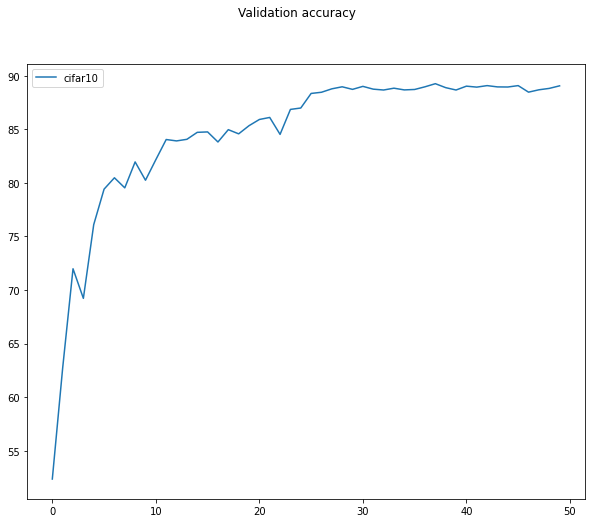


**** Ended Plotting multigraph ****


**** Started Plotting multigraph ****



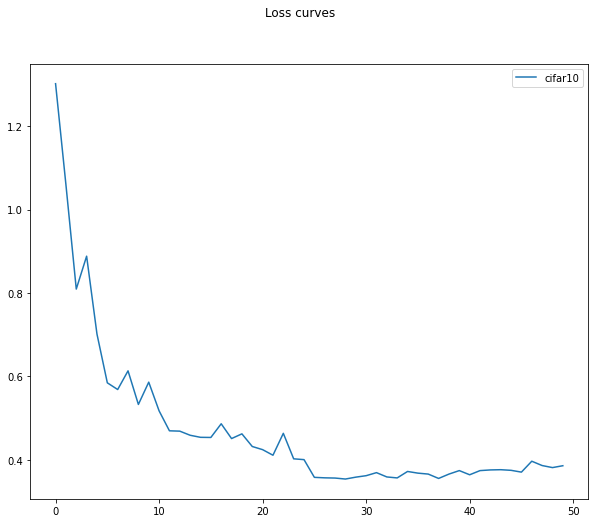


**** Ended Plotting multigraph ****



In [ ]:
plot_multigraph(lst_plottingJobs_val_acc,lst_plottingLegends_val_acc,title="Validation accuracy")
plot_multigraph(lst_plottingJobs_loss,lst_plottingLegends_loss,title="Loss curves")



**** Started plot_misclassified_images ****



/content/drive/My Drive/data_science/computer_vision/session7_assignment/Week7New/models/networks/cifar10_dialation_dsc_vgg.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



**** Ended plot_misclassified_images ****



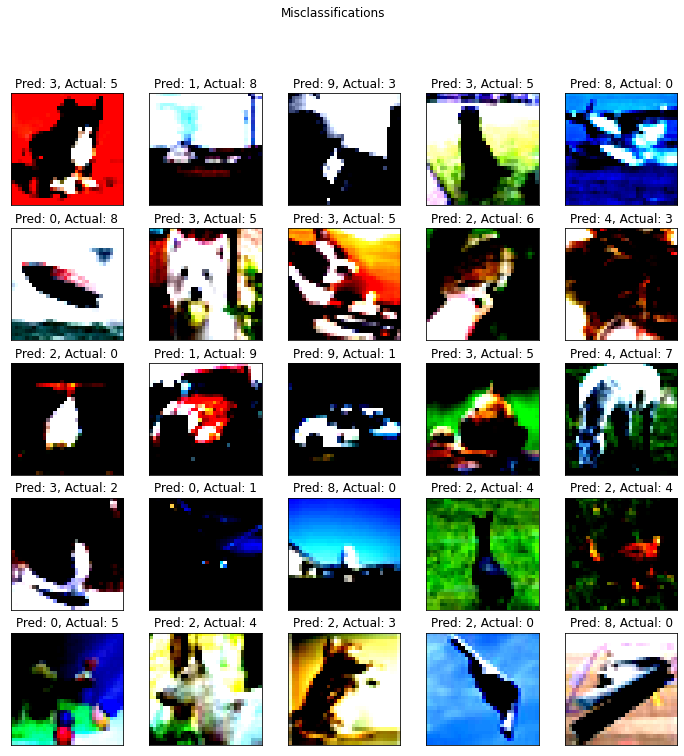

In [ ]:
plot_misclassified_images_test(results['cifar10'][4], device, test_loader, num_of_images = 25)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

GroundTruth:   deer horse   car   cat


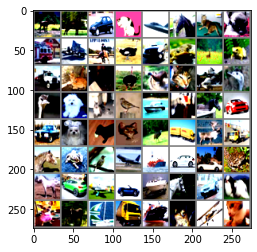

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = model(images.to(device))

/content/drive/My Drive/data_science/computer_vision/session7_assignment/Week7New/models/networks/cifar10_dialation_dsc_vgg.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer horse   car   cat


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/content/drive/My Drive/data_science/computer_vision/session7_assignment/Week7New/models/networks/cifar10_dialation_dsc_vgg.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Accuracy of the network on the 10000 test images: 89 %


In [ ]:
display_classwise_accuracy(test_loader,device,model)

/content/drive/My Drive/data_science/computer_vision/session7_assignment/Week7New/models/networks/cifar10_dialation_dsc_vgg.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Accuracy of plane : 85 %
Accuracy of   car : 86 %
Accuracy of  bird : 75 %
Accuracy of   cat : 72 %
Accuracy of  deer : 89 %
Accuracy of   dog : 81 %
Accuracy of  frog : 93 %
Accuracy of horse : 96 %
Accuracy of  ship : 97 %
Accuracy of truck : 98 %


In [ ]:
torch.save(model, 'check_points/Session7_assignment_step_size_25_random_crop.h5')